# Transit-Network
Making plots for my SETI idea, dreamed up on the airplane home from AAS 227


## SHELVED
I put this idea on the backburner and removed it from the paper because it has an extra layer of confusion:
if the ETI goal is to simply send a 1-bit message ("we're here!") then we don't need an extra unknown relation (i.e. the relation of orbital period and separation). Instead it is *easier* to find (and probably build) a beacon where all the periods are the same in a region (or if not periods, transit depths, or time of transit, etc)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

The idea is simple: ET's would place artificial satellites in orbit around stars surrounding their home star system. The orbit period of the remote artificial satellites (or beacons) would be proportional to the distance from the remote star to the home star system. Each remote beacon system would be part of a network map leading to the home system. If the orbital period vs beacon distance relationship was known, the exact location of the home system could be triangulated using only a subset of the beacons.

# First toy model (2D)

In [2]:
Alpha = 3./2.
ab_dist = np.array([2., 3.,3.5, 6., 6.7, 7., 8.2, 14., 18., 20.])
ab_per = ab_dist ** (Alpha)

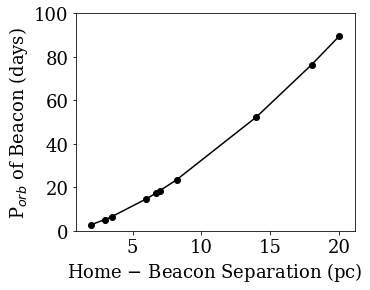

In [3]:
# a figure of the 1-d projection, the key for SETI.
plt.figure(figsize=(5,4))
plt.plot(ab_dist, ab_per, 'k')
plt.scatter(ab_dist, ab_per,color='k')
plt.xlabel('Home $-$ Beacon Separation (pc)')
plt.ylabel('P$_{orb}$ of Beacon (days)')
plt.ylim(0,100)
plt.savefig('dist_per.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [4]:
# figure angle on sky to plot

# theta = np.random.random(len(ab_dist)) * 2. * np.pi

 # freeze this random config, i like it
theta = np.array([ 4.52448995,  3.46489278,  0.33872438,  1.6891746 ,  2.37611205,
        2.72516744,  5.41764719,  4.01860732,  1.72938583,  0.60279578])
x = ab_dist * np.cos(theta)
y = ab_dist * np.sin(theta)

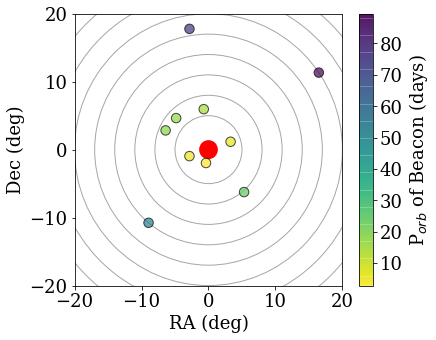

In [5]:
# a figure of the 2-d observed (sky) plane 

plt.figure(figsize=(6,5))
plt.axes()
# the central red cicrle
circ = plt.Circle((0,0), radius=1.4, fc='r', zorder=0)
plt.gca().add_patch(circ)

# make the concentric circles
for k in range(5,29,3):
    circ = plt.Circle((0,0), radius=k, fc='none', alpha=0.35, color='k')
    plt.gca().add_patch(circ)

plt.scatter(x,y, c=ab_per, cmap=cm.viridis_r, s=90, alpha=0.7, edgecolors='k', zorder=2)
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
cbar = plt.colorbar()
cbar.set_label('P$_{orb}$ of Beacon (days)')
plt.savefig('sky_per.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25)
plt.show()

# a simple 3D model

In [6]:
n_b = 1000 # number of beacon systems

# n_b = 1e6

i_max = 90.
# i_max = 10. # what if we forced beacons to be roughly aligned w/ Galactic plane?

d_min = 2 # min distance from ET home world to place beacons (pc)
d_max = 50 # max distance from ET home world to place beacons (pc)

d_home = 1000 # distance from Earth to ET Home world (in pc)

alpha = 3. / 2. # the coefficient to encode the period-distance relationship - in this case Kepler 3rd law

R_star = 6.955e10 # cm (R_Sun)
R_planet = 7149235 # cm (R_Jupiter)
AU = 1.49598e13 # cm (1 AU)

#__ the part to repeat __
rad = np.random.random(n_b) * (d_max - d_min) + d_min # dist from ET Home to Beacons (pc)

per = rad**Alpha # the period, in days by arbitrary construction

a_AU = (per / 365.)**(2./3.) # the orbital semimajor axis (in AU), assuming solar scaling

incl = np.random.random(n_b) * i_max # orbit plane inclination (deg)
#__

# plt.scatter(a_AU, per, s=90, alpha=0.6)
# plt.xlabel('a (AU)')
# plt.ylabel('Period (days)')

In [7]:
# determine if beacon is "visible", i.e. does it Transit?

b = a_AU * AU * np.sin(incl / 180. * np.pi)

Transit = b < (R_star + R_planet)
no_Transit = b >= (R_star + R_planet)

print(sum(Transit), n_b, float(sum(Transit)) / n_b)
# plt.scatter(a_AU[no_Transit], per[no_Transit], s=20, alpha=0.6, c='blue', lw=0)
# plt.scatter(a_AU[Transit], per[Transit], s=100, alpha=0.6, c='red', lw=0)
# plt.xlabel('a (AU)')
# plt.ylabel('Period (days)')
# plt.xlim(0,2)

(7, 1000, 0.007)


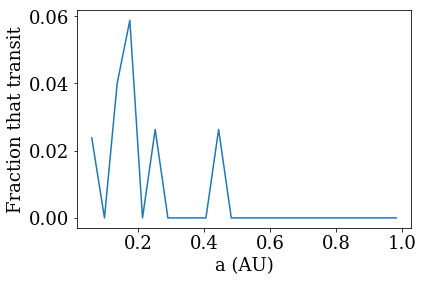

In [8]:
# make a plot of fraction of systems that transit as a function of orbital semimajor axis (a)
yy, aa = np.histogram(a_AU[Transit], bins=25, range=(min(a_AU),1))
nn, aa = np.histogram(a_AU[no_Transit], bins=25, range=(min(a_AU),1))

plt.plot((aa[1:] + aa[0:-1])/2., np.array(yy, dtype='float') / nn)
plt.xlabel('a (AU)')
plt.ylabel('Fraction that transit')

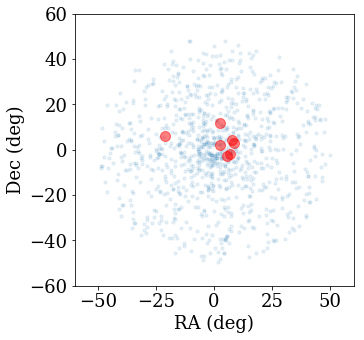

In [9]:
# now put beacons in random places in space to illustrate on the sky
theta = np.random.random(n_b) * 2 * np.pi
phi = np.random.random(n_b) * np.pi

x = rad * np.cos(theta)
y = rad * np.sin(theta)

plt.figure(figsize=(5,5))
plt.scatter(x[no_Transit], y[no_Transit], s=10, alpha=0.1)
plt.scatter(x[Transit], y[Transit], s=100, alpha=0.5, c='red')
plt.xlim(-60,60)
plt.ylim(-60,60)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.savefig('3d_model.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [10]:
'''
# repeat this 3d toy model 1000 times to get smooth recovery fraction

hist_smooth = np.zeros_like(yy)
num_smooth  = np.zeros_like(nn)
num_transit = np.zeros(1000)
for k in range(1000):
    rad = np.random.random(n_b) * (d_max - d_min) + d_min # dist from ET Home to Beacons (pc)

    per = rad**alpha # the period, in days by arbitrary construction

    a_AU = (per / 365.)**(2./3.) # the orbital semimajor axis (in AU), assuming solar scaling

    incl = np.random.random(n_b) * i_max # orbit plane inclination (deg)
    b = a_AU * AU * np.sin(incl / 180. * np.pi)

    Transit = b < (R_star + R_planet)
    no_Transit = b >= (R_star + R_planet)

    yy, aa = np.histogram(a_AU[Transit], bins=25, range=(0,2))
    nn, aa = np.histogram(a_AU[no_Transit], bins=25, range=(0,2))

    hist_smooth = hist_smooth + np.array(yy, dtype='float')
    num_smooth = num_smooth +  np.array(nn, dtype='float')
    
#     plt.plot((aa[1:] + aa[0:-1])/2., np.array(yy, dtype='float') / nn, alpha=0.1, c='k')
    num_transit[k] = (float(sum(Transit)) / n_b)

plt.plot((aa[1:] + aa[0:-1])/2., hist_smooth / num_smooth, lw=2);
plt.xlabel('a (AU)');
plt.ylabel('Fraction that transit');
# plt.savefig('recov_fraction.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25)
print(np.mean(num_transit), np.std(num_transit))
''';

OK, so our toy model works... but how do we actually detect these beacons among the noise of naturally occuring exoplanets we've detected? 

if we had the Kepler exoplanet database
and "injected" this signal (assuming the Kepler cadence was 100% effective in detecting transiting systems), would we see an "over density" or concentration of orbital periods as a funcrtion of location?

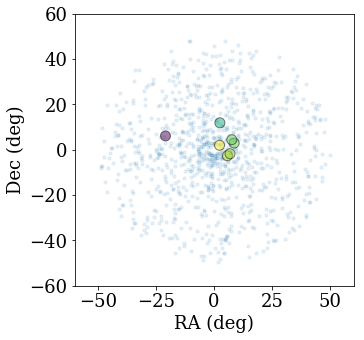

In [11]:
plt.figure(figsize=(5,5))
plt.scatter(x[no_Transit], y[no_Transit], s=10, alpha=0.1)
plt.scatter(x[Transit], y[Transit], s=100, alpha=0.5, c=per[Transit], edgecolors='k', cmap=cm.viridis_r)
plt.xlim(-60,60)
plt.ylim(-60,60)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')

plt.savefig('3dcolor.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25)

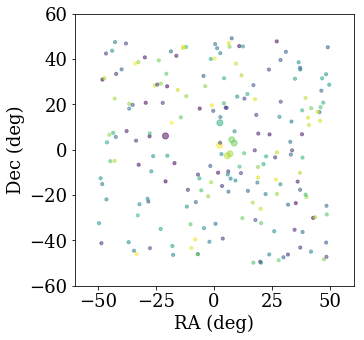

In [12]:
Nother = 200

plt.figure(figsize=(5,5))
# plt.scatter(x[no_Transit], y[no_Transit], s=10, alpha=0.1)
plt.scatter(x[Transit], y[Transit], alpha=0.5, c=per[Transit], cmap=cm.viridis_r)
plt.scatter(np.random.random(Nother)*100-50,np.random.random(Nother)*100-50, 
            c=np.random.random(Nother)*250+5, alpha=.5, s=10)
plt.xlim(-60,60)
plt.ylim(-60,60)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.savefig('3dcolor_bkgd.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25)